In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


%matplotlib inline

In [15]:
df = pd.read_excel("new_haven_property.xlsx")

In [16]:
df

,OwnerName,OwnerAddress,OwnerCity
0,CITY OF NEW HAVEN AIRPORT,165 CHURCH ST,NEW HAVEN
1,CITY OF NEW HAVEN AIRPORT,165 CHURCH ST,NEW HAVEN
2,PEREZ-RAMIREZ NOE MARTIN,199 SOUTH END RD,NEW HAVEN
3,RODRIGUEZ WILLIAM & LYSIE,11 URIAH ST,NEW HAVEN
4,GUEST CRAIG C,181 SOUTH END RD,NEW HAVEN
...,...,...,...
26915,FERRER YAMARA T,92 JUDITH TER,NEW HAVEN
26916,JOHNSON CLEMENTINE,40 RIVERVIEW RD,NEW HAVEN
26917,LUCIANO KENNETH & KEILA,30 RIVERVIEW RD,NEW HAVEN
26918,RAMOS CARLOS & ARROYO MARICEL,103 JUDITH TER,NEW HAVEN


In [17]:
df.isnull().sum()

OwnerName       171
OwnerAddress    175
OwnerCity       176
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

OwnerName       0
OwnerAddress    0
OwnerCity       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 0 to 26919
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OwnerName     26744 non-null  object
 1   OwnerAddress  26744 non-null  object
 2   OwnerCity     26744 non-null  object
dtypes: object(3)
memory usage: 835.8+ KB


In [21]:
df.describe()

,OwnerName,OwnerAddress,OwnerCity
count,26744,26744,26744
unique,19896,19094,531
top,CITY OF NEW HAVEN,165 CHURCH ST,NEW HAVEN
freq,677,739,22104


C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


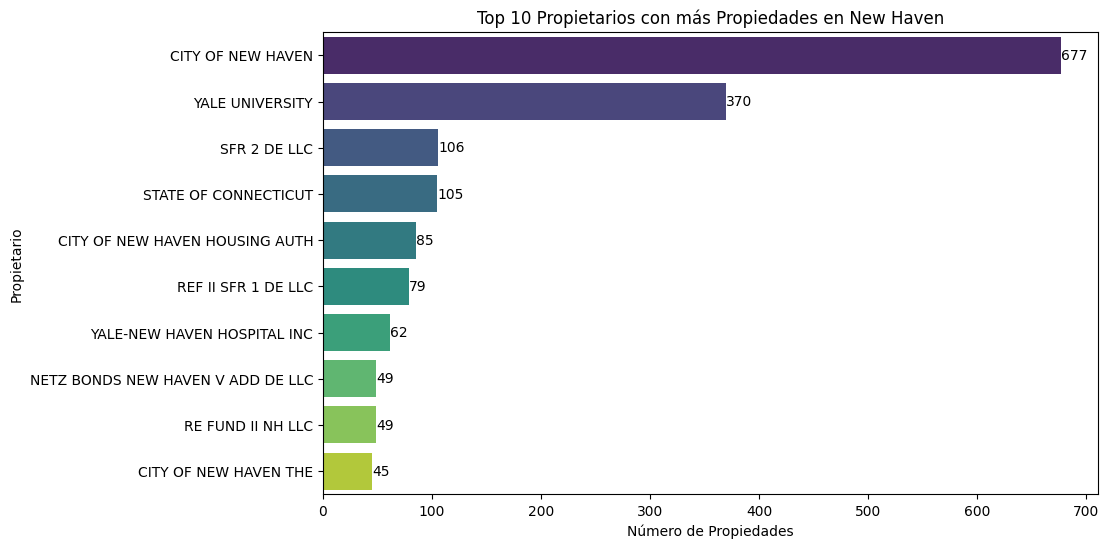

In [27]:
# Agrupa por el nombre del propietario y cuenta el número de propiedades
top_property_owners = df['OwnerName'].value_counts().reset_index()

# Renombra las columnas
top_property_owners.columns = ['OwnerName', 'PropertyCount']

# Ordena en orden descendente por el número de propiedades
top_property_owners = top_property_owners.sort_values(by='PropertyCount', ascending=False)

# Muestra los cinco primeros propietarios con la mayor cantidad de propiedades
top_10_property_owners = top_property_owners.head(10)

# Utiliza Seaborn para crear un gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='PropertyCount', y='OwnerName', data=top_10_property_owners, palette='viridis')
plt.xlabel('Número de Propiedades')
plt.ylabel('Propietario')
plt.title('Top 10 Propietarios con más Propiedades en New Haven')
for index, row in top_10_property_owners.iterrows():
    barplot.text(row['PropertyCount'], index, str(row['PropertyCount']), va='center')
plt.show()

C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


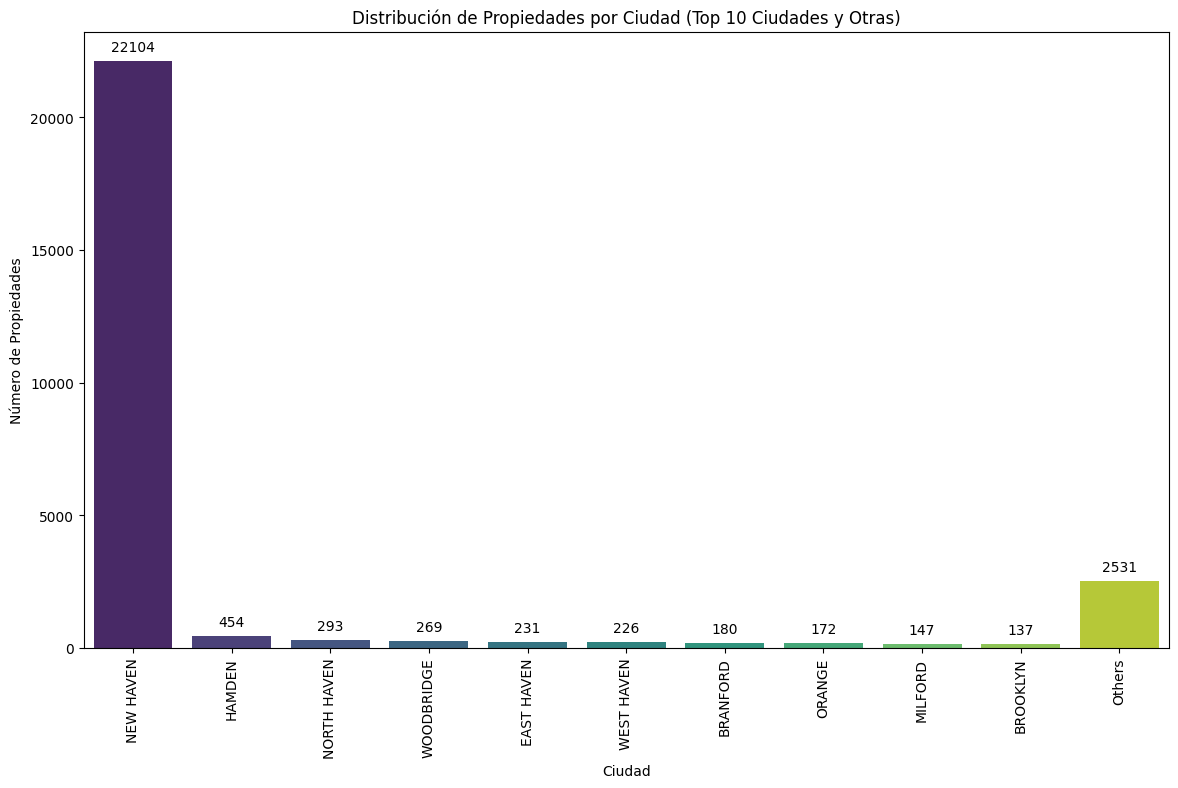

In [23]:
top_cities_count = 10
top_cities = df['OwnerCity'].value_counts().head(top_cities_count).index

# Crea una nueva columna 'OwnerCityFiltered' que agrupa las ciudades menos comunes en 'Otras'
df['OwnerCityFiltered'] = df['OwnerCity'].apply(lambda x: x if x in top_cities else 'Others')

# Utiliza Seaborn para crear un gráfico de barras de la distribución de ciudades
plt.figure(figsize=(14, 8))
order = list(top_cities) + ['Others']

barplot = sns.countplot(x='OwnerCityFiltered', data=df, palette='viridis', order=order)
plt.xlabel('Ciudad')
plt.ylabel('Número de Propiedades')
plt.title(f'Distribución de Propiedades por Ciudad (Top {top_cities_count} Ciudades y Otras)')

plt.xticks(rotation=90)  # Rotar etiquetas del eje X para mayor legibilidad

# Agregar etiquetas de valor en las barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()

C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


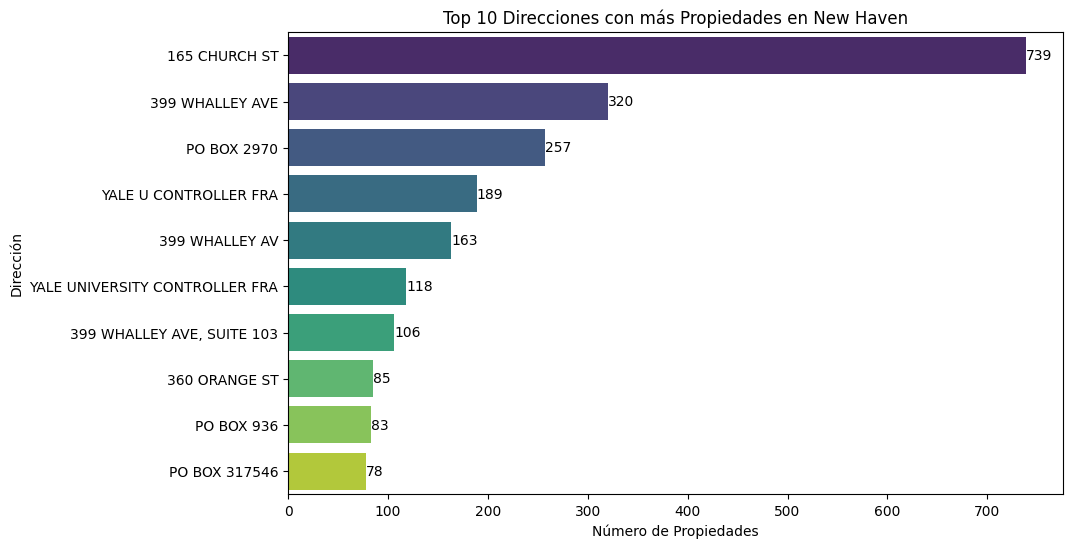

In [24]:
# Contar cuántas propiedades comparten la misma dirección
address_counts = df['OwnerAddress'].value_counts().reset_index()
address_counts.columns = ['OwnerAddress', 'PropertyCount']

# Ordenar en orden descendente por el número de propiedades
address_counts = address_counts.sort_values(by='PropertyCount', ascending=False)

# Muestra las 10 direcciones con más propiedades
top_10_addresses = address_counts.head(10)

# Utiliza Seaborn para crear un gráfico de barras de las 10 direcciones principales
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='PropertyCount', y='OwnerAddress', data=top_10_addresses, palette='viridis')
plt.xlabel('Número de Propiedades')
plt.ylabel('Dirección')
plt.title('Top 10 Direcciones con más Propiedades en New Haven')

# Agrega el número exacto de propiedades en cada barra
for index, row in top_10_addresses.iterrows():
    barplot.text(row['PropertyCount'], index, str(row['PropertyCount']), va='center')

plt.show()